# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Learning

Episode 100	Average Score: -0.0050


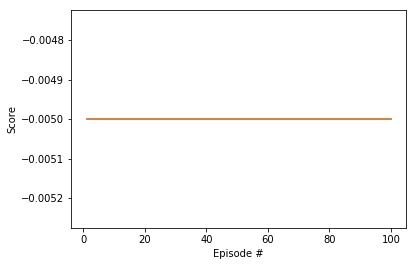

Episode 200	Average Score: -0.0030


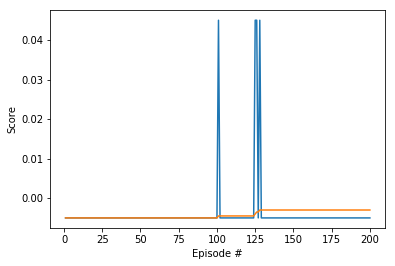

Episode 300	Average Score: -0.0050


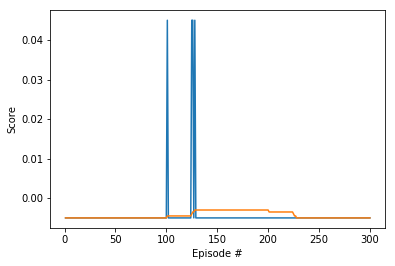

Episode 400	Average Score: 0.01455


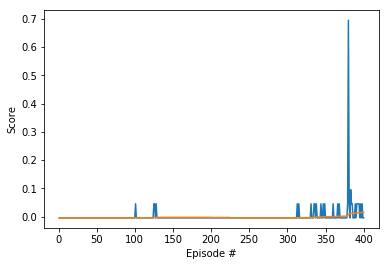

Episode 500	Average Score: 0.0020


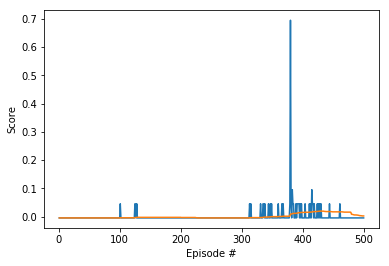

Episode 600	Average Score: 0.00005


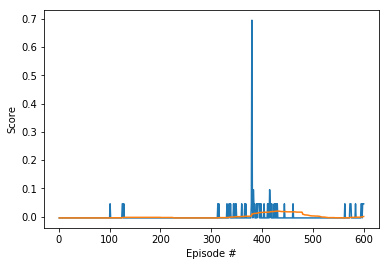

Episode 700	Average Score: 0.0305


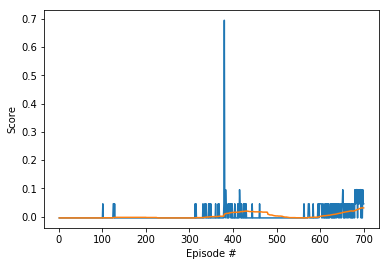

Episode 800	Average Score: 0.1395


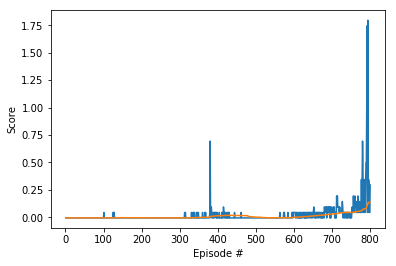

Episode 900	Average Score: 0.0845


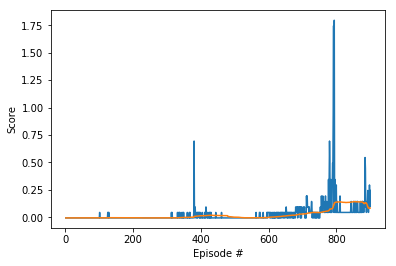

Episode 1000	Average Score: 0.5812


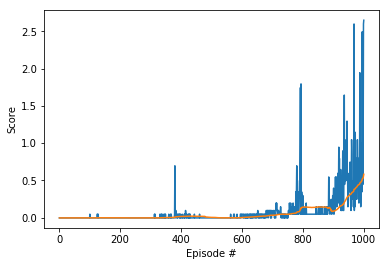

Episode 1034	Average Score: 1.1414

KeyboardInterrupt: 

In [5]:
%reload_ext autoreload
%autoreload 2

import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg import MADDPG

#state_size, action_size, n_agnets, random_seed
agent = MADDPG(24, 2, 2, 0)

def maddpg(n_episodes=3000, print_every=100):
    """Learning by "Deep Deterministic Policy Gradient" - Method (DDPG)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        print_every (int): print score every 'print_every' episodes
    """    
    
    scores_window = deque(maxlen=100)                      # save last 100 total scores in one episode
    all_scores = []
    avg_scores_window = []
    max_score = 0                                          # save best score in that run
    
    for i_episode in range(1, n_episodes+1):

        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current state
        
        agent.reset()                                      # reset the agent                                     
        scores = np.zeros(num_agents)                      # initialize the score

        while True:
            actions = agent.act(states)                    # select an action from one agent
            env_info = env.step(actions)[brain_name]       # perform the action
            
            next_states = env_info.vector_observations          # get next state
            #print("states", states)
            #print("next_states", next_states)
            #print("actions", actions)
            rewards = env_info.rewards                          # get reward
            #print("rewards from env_info",rewards)
            dones = env_info.local_done                         # check done

            agent.step(states, actions, rewards, next_states, dones, num_updates=3) # agent step

            states = next_states
            scores += rewards
            

            if np.any(dones):
                break 
        
        # score for one episode of mean of all agents
        avg_score = np.mean(scores)
        #print(avg_score)
        
        # save last 100 avg_score scores
        scores_window.append(avg_score)
        #print(scores_window)
        
        all_scores.append(avg_score)
        avg_scores_window.append(np.mean(scores_window))
        #print(avg_scores_window)
        noise_damp = np.mean(scores_window)
        
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_window)), end="")
        
        # save agent if 100 perfomance is better, that max_score
        if max_score < np.mean(scores_window):
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            max_score = np.mean(scores_window)
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(1, len(all_scores)+1), all_scores)
            plt.plot(np.arange(1, len(avg_scores_window)+1), avg_scores_window)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
        
    return all_scores, avg_scores_window



all_scores, avg_scores_window = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(all_scores)+1), all_scores)
plt.plot(np.arange(1, len(avg_scores_window)+1), avg_scores_window)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [6]:
env.close()